# Experiment Analysis
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and the number of timesteps in the dataset
2. Determine what effect increasing the number patterns are w.r.t. this relationship
3. Investigate what changing the input size has on the neural network
4. Determine what effect sparsity has on the capacity of the neural networks
5. Investigate which activation function lead to the highest retention of information
6. What type of network is able to retain the most information 

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

# Sparsity Analysis

In [2]:
df = pd.read_csv("sparsity.csv", delimiter=",")
df.head(5)

,folder_root,run_count,f_score,timesteps,sparsity_length,case_type,num_input,num_output,num_patterns_to_recall,num_patterns_total,...,batch_size,epocs,activation_function,num_correctly_identified,architecture,full_network_json,model_history,full_network,input_set,output_set
0,INFO:root:sparsity,1,0.555,1,10,1,10,10,8,1024,...,10,964,softmax,0,NaN,NaN,NaN,NaN,NaN,NaN
1,INFO:root:sparsity,1,0.920,1,10,1,10,10,8,1024,...,10,628,elu,0,NaN,NaN,NaN,NaN,NaN,NaN
2,INFO:root:sparsity,1,0.920,1,10,1,10,10,8,1024,...,10,436,selu,0,NaN,NaN,NaN,NaN,NaN,NaN
3,INFO:root:sparsity,1,0.920,1,10,1,10,10,8,1024,...,10,404,softplus,0,NaN,NaN,NaN,NaN,NaN,NaN
4,INFO:root:sparsity,1,0.254,1,10,1,10,10,8,1024,...,10,848,softsign,0,NaN,NaN,NaN,NaN,NaN,NaN


## Number of parameters $\varpropto$ sparsity


### Overall

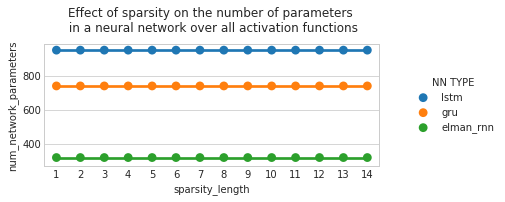

In [3]:
from matplotlib import pyplot
def plot_by_filter(x_col, 
                   y_col, 
                   x_label="",
                   y_label='Number of network parameters',
                   title="Effect of Sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type", 
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (6, 2.25)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.legend(title=filter_val.upper(), loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
filter_col = "network_type"
x_label="Sparsity Length"  
x_col="sparsity_length"

plot_by_filter(x_col="sparsity_length", 
               y_col="num_network_parameters",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of sparsity on the number of parameters " + 
                       "\n in a neural network over all activation functions", 
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)    

In [4]:
filter_col = "network_type"
filter_col_1 = "sparsity_length" 
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby(["sparsity_length", "network_type"]).agg({"num_network_parameters": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp["sparsity_length"] = df_temp["sparsity_length"].astype(float)
    df_temp["num_network_parameters"] = df_temp["num_network_parameters"].astype(float)
    
    print("Pearson Correlation Between Sparsity length and Number of Network Parameters for", filter_val, df_temp["sparsity_length"].corr(df_temp["num_network_parameters"]))

Pearson Correlation Between Sparsity length and Number of Network Parameters for lstm nan
Pearson Correlation Between Sparsity length and Number of Network Parameters for gru nan
Pearson Correlation Between Sparsity length and Number of Network Parameters for elman_rnn nan


### Discussion of results

                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
                            #### TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

From the Pearson coefficient, it is clear that there is a small negative relationship between the number of timesteps and the number of network parameters required for the Elman RNN. For the LSTM and GRU it seems that the relationship is steadily increasing with the number of required timesteps.

Upon inspecting the graph of the results however, it is more apparent that this small correlation is due to variablity in the experiment during training. Thus it is safe to assume that there is no correlation between the number of network parameters required and the number of time steps with sparsity, number of patterns and output nodes fixed.  

### Effect of sparsity of patterns on networks with specific activation functions

In [5]:
filter_col = "activation_function"
for filter_val in df[filter_col].unique():
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"num_network_parameters": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["num_network_parameters"] = df_temp["num_network_parameters"].astype(float)
    
    print("Pearson Correlation Between Sparsity Length and Number of Network Parameters for", filter_val, df_temp[filter_col_1].corr(df_temp["num_network_parameters"]))

Pearson Correlation Between Sparsity Length and Number of Network Parameters for softmax nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for elu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for selu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for softplus nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for softsign nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for tanh nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for sigmoid nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for hard_sigmoid nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for relu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for linear nan


### Discussion of activation functions  ∝ time steps



In [6]:
filter_col = "activation_function"
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["network_type"].unique():
        df_temp = df[df["network_type"] == filter_val_1]
        df_temp = df[df[filter_col] == filter_val]
        df_temp = df_temp.groupby([filter_col_1]).agg({"num_network_parameters": "mean"}).to_records()
        df_temp = pd.DataFrame.from_records(df_temp)
        df_temp[x_col] = df_temp[filter_col_1].astype(float)
        df_temp["num_network_parameters"] = df_temp["num_network_parameters"].astype(float)

        print("Pearson Correlation Between Sparsity Length and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["num_network_parameters"]))

Pearson Correlation Between Sparsity Length and Number of Network Parameters for lstm softmax nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for gru softmax nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for elman_rnn softmax nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for lstm elu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for gru elu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for elman_rnn elu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for lstm selu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for gru selu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for elman_rnn selu nan
Pearson Correlation Between Sparsity Length and Number of Network Parameters for lstm softplus nan
Pearson Correlation Between 

            # TOTOTOTOTOTODOODODODODOODODODO

### Effect of sparsity length on training time 

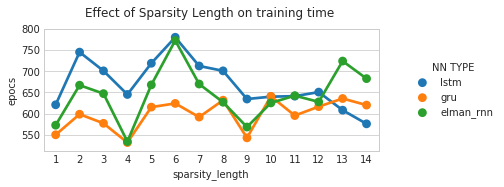

In [7]:
filter_col = "network_type"
    
plot_by_filter(x_col=filter_col_1, 
               y_col="epocs",
               x_label=x_label,
               y_label='Number of EPOCS required to train network',
               title="Effect of "+x_label+" on training time ", 
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)    

### Effect of sparsity length on training time for each activation 

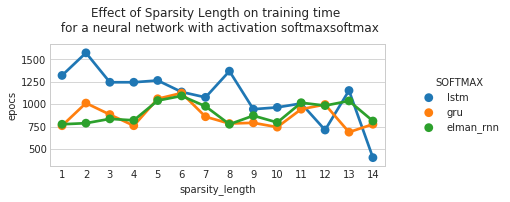

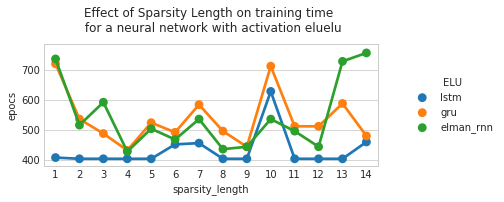

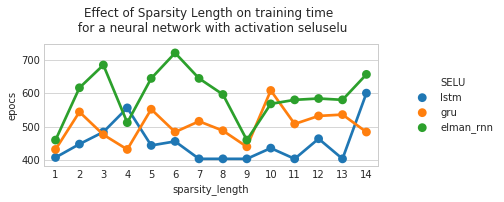

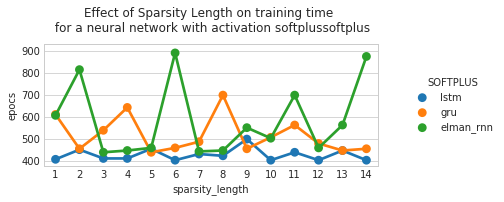

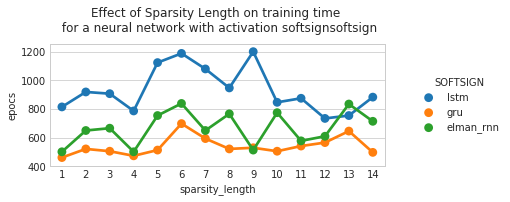

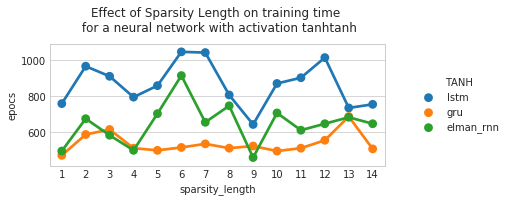

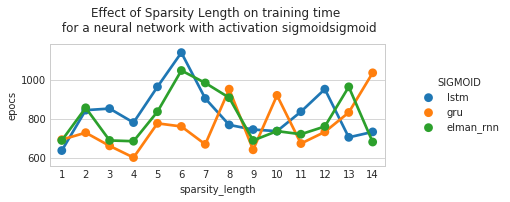

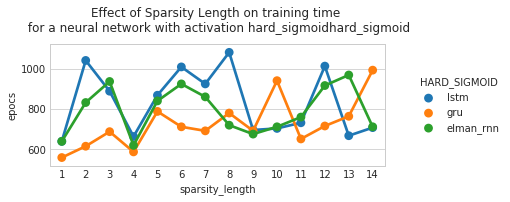

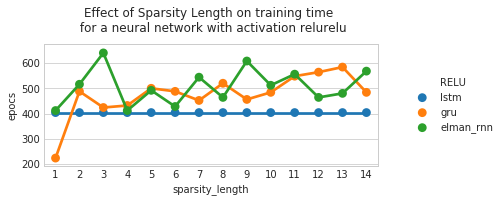

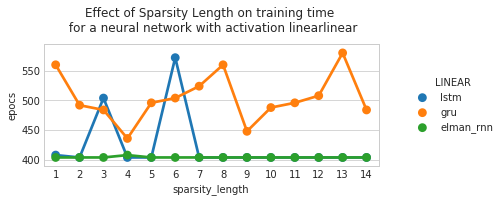

In [8]:
filter_col = "activation_function"
for filter_val in df[filter_col].unique():
    plot_by_filter(x_col=filter_col_1, 
                   y_col="epocs",
                   x_label=x_label,
                   y_label='Number of EPOCS required to train network',
                   title="Effect of "+x_label+" on training time " +
                           "\n for a neural network with activation " +str(filter_val), 
                   hue="network_type",
                  filter_col=filter_col, filter_val=filter_val, df=df)    
    

### Effect of sparsity on f-score

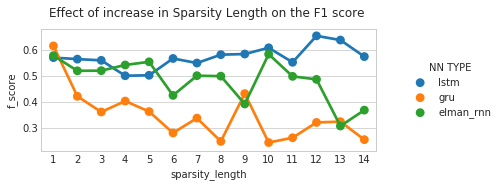

In [9]:
plot_by_filter(x_col="sparsity_length", 
               y_col="f_score",
               x_label=x_label,
               y_label='F1-score of the neural network',
               title="Effect of increase in "+x_label+" on the F1 score ",
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)  

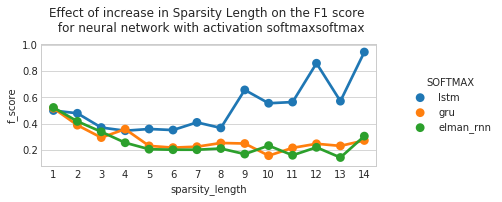

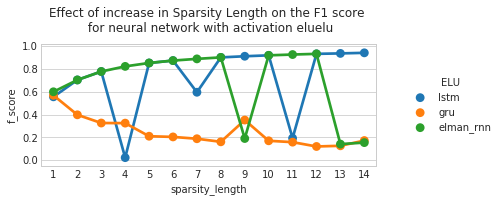

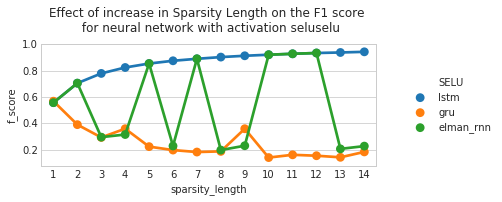

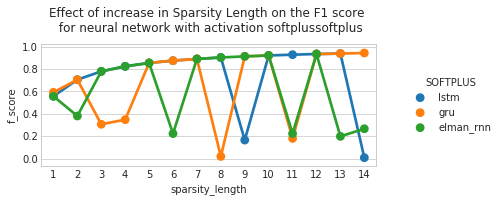

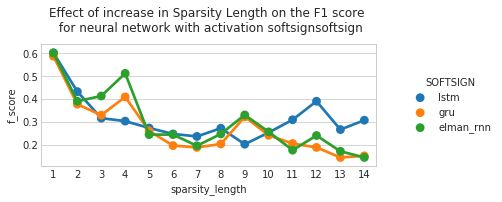

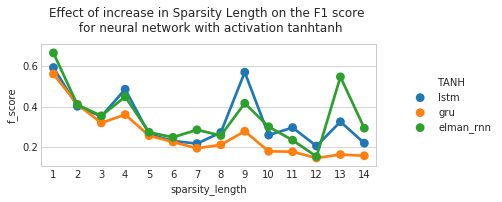

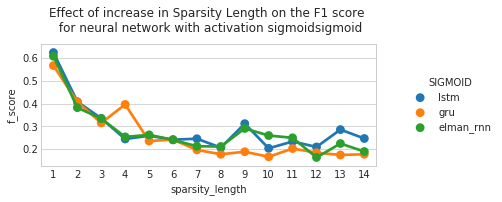

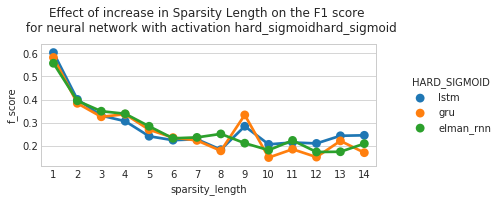

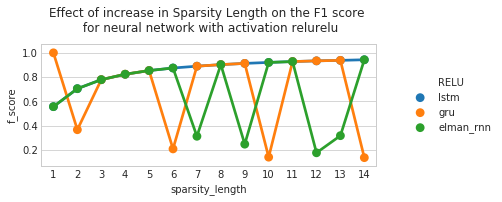

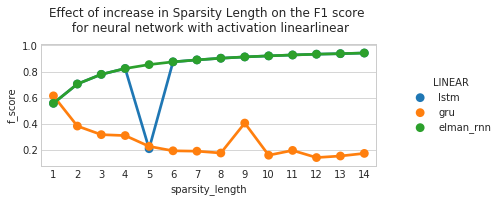

In [10]:
filter_col = "activation_function"
for filter_val in df[filter_col].unique():
    plot_by_filter(x_col="sparsity_length", 
               y_col="f_score",
               x_label=x_label,
               y_label='F1-score of the neural network',
               title="Effect of increase in "+x_label+" on the F1 score "+
                           "\n for neural network with activation " +str(filter_val), 
               hue="network_type",
              filter_col=filter_col, filter_val=filter_val, df=df)  

### Conclusion about capacity?

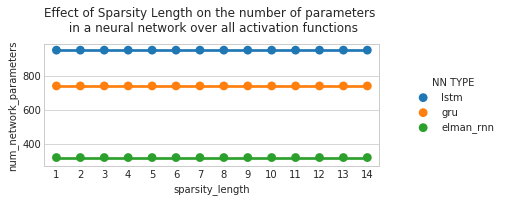

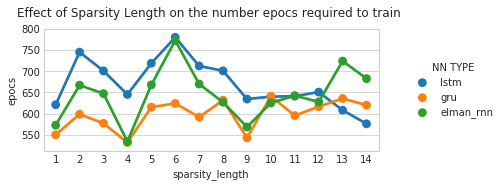

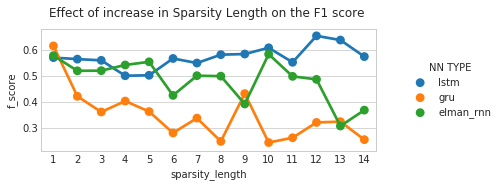

In [11]:
# plt.legend()
filter_col = "network_type"
    
plot_by_filter(x_col="sparsity_length", 
               y_col="num_network_parameters",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of "+x_label+" on the number of parameters " + 
                       "\n in a neural network over all activation functions", 
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)   

plot_by_filter(x_col="sparsity_length", 
               y_col="epocs",
               x_label=x_label,
               y_label='Number of EPOCS to train network',
               title="Effect of "+x_label+" on the number epocs required to train ",
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)  

plot_by_filter(x_col="sparsity_length", 
               y_col="f_score",
               x_label=x_label,
               y_label='F1-score of the neural network',
               title="Effect of increase in "+x_label+" on the F1 score ",
               hue="network_type",
              filter_col=filter_col, filter_val=None, df=df)  